In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
tf.__version__

'2.2.0-rc2'

## Step 1: Preprocess the Data

In [0]:
# Load the data
import pandas as pd
dataset = pd.read_csv('sales.csv')
# pandas dataframe

In [0]:
dataset.head()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,3.5,1,0,1,0,1,0,0,132717,59.99
1,4.5,0,0,0,0,1,1,0,83407,49.99
2,3.0,0,0,0,0,1,1,0,62423,49.99
3,4.5,1,0,0,0,0,0,1,69889,39.99
4,4.0,1,0,1,0,1,0,1,161382,59.99


In [0]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [0]:
y_train = x_train.pop('total_earnings')
y_test = x_test.pop('total_earnings')

In [0]:
# Scale the data (normalization)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#fit: learn min and max for each column
#transform: scale data to range 0-1

In [0]:
# # Save the scaler
# from sklearn.externals import joblib
# joblib.dump(scaler, "scaler.pkl")  

## Step 2: Build the NN Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
x_train.shape

(700, 9)

In [0]:
model = Sequential() #empty containers
model.add(Dense(50, input_shape=[9], activation='relu')) # 1st hidden layer
model.add(Dense(100, activation='relu')) # 2st hidden layer
model.add(Dense(200, activation='relu')) # 3st hidden layer
model.add(Dense(1, activation='linear')) # output layer

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                500       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_10 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 201       
Total params: 26,001
Trainable params: 26,001
Non-trainable params: 0
_________________________________________________________________


## Step 3: Compile the Model

In [0]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

## Step 4: Train the Model

In [0]:
history = model.fit(x_train,y_train,
                    epochs = 50,
                    batch_size = 32,
                    shuffle = True,
                    validation_split = 0.3)

Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 14133740544.0000 - val_loss: 13977474048.0000
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 14331588608.0000 - val_loss: 13975514112.0000
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 14471506944.0000 - val_loss: 13967612928.0000
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 14174242816.0000 - val_loss: 13941533696.0000
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 14157723648.0000 - val_loss: 13871147008.0000
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 13989888000.0000 - val_loss: 13711160320.0000
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 13714158592.0000 - val_loss: 13393238016.0000
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 13775984640.0000 - val_loss: 12827260928.0000
Epoch 9/50
16/16 [==============================] - 0s 4

In [0]:
# history.history

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

In [0]:
# loss

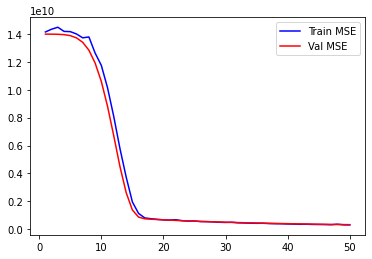

In [0]:
import matplotlib.pyplot as plt
plt.plot(epochs, loss,'b',label='Train MSE')
plt.plot(epochs, val_loss,'r',label='Val MSE')
plt.legend()
plt.show()

## Step 5: Evaluate the Model

In [0]:
mse = model.evaluate(x_test, y_test)
mse**0.5

10/10 [==============================] - 0s 1ms/step - loss: 316891712.0000


17801.452525004806

## Step 6: Save Model

In [0]:
# only readable by python keras
model.save('regression.h5')

In [0]:
# SavedModel (deployment in other environments)
model.save('regression/1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: regression/1/assets


## Step 7: Load Model and Prediction

In [0]:
from tensorflow.keras.models import load_model
model = load_model('regression.h5')

In [0]:
x_test.shape

(300, 9)

In [0]:
y_pred = model.predict(x_test)
y_pred

array([[107392.68 ],
       [ 73831.805],
       [133673.62 ],
       [119719.81 ],
       [111179.23 ],
       [106912.99 ],
       [108285.   ],
       [ 97455.6  ],
       [ 90522.79 ],
       [ 86045.27 ],
       [103185.88 ],
       [ 51799.043],
       [101656.79 ],
       [101813.875],
       [173089.45 ],
       [156998.27 ],
       [ 96557.664],
       [118426.2  ],
       [134037.7  ],
       [ 55701.24 ],
       [123004.19 ],
       [158370.3  ],
       [167510.66 ],
       [ 74754.23 ],
       [ 93807.18 ],
       [ 95567.71 ],
       [ 78080.04 ],
       [102136.49 ],
       [165999.61 ],
       [133673.62 ],
       [151123.34 ],
       [ 75803.63 ],
       [103647.57 ],
       [108285.   ],
       [ 85266.59 ],
       [ 94328.3  ],
       [ 99744.43 ],
       [140763.53 ],
       [ 99063.375],
       [ 97929.7  ],
       [118797.4  ],
       [ 64241.816],
       [126044.37 ],
       [ 72248.516],
       [102136.49 ],
       [108746.68 ],
       [148918.4  ],
       [16074

In [0]:
single_record = [[3.5,1,	0,	1,	0,	1,	0,	0,	59.99]]

In [0]:
scaler = joblib.load("scaler.pkl")
single_scaled = scaler.transform(single_record)
single_scaled

array([[0.5, 1. , 0. , 1. , 0. , 1. , 0. , 0. , 1. ]])

In [0]:
from tensorflow.keras.models import load_model
model = load_model('regression.h5')

In [0]:
model.predict(single_scaled)

array([[140763.53]], dtype=float32)

# Challenge: Regression

In [0]:
# Load the data
import pandas as pd
dataset = pd.read_csv('boston.csv')

In [0]:
# medv: median house val
dataset.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [0]:
dataset.pop('ID')
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [0]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)


In [0]:
y_train = x_train.pop('medv')
y_test = x_test.pop('medv')

In [0]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
x_train.shape

(233, 13)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='linear'))

In [0]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [0]:
history = model.fit(x_train,y_train,
                    epochs=50,
                    shuffle=True,
                    validation_split = 0.3)

Epoch 1/50
6/6 [==============================] - 0s 15ms/step - loss: 575.5944 - val_loss: 674.9730
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 546.3763 - val_loss: 631.4998
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 532.7806 - val_loss: 561.3956
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 392.0446 - val_loss: 452.6303
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 403.5880 - val_loss: 307.4508
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 185.8732 - val_loss: 179.8811
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 121.2949 - val_loss: 148.7382
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 132.7366 - val_loss: 138.0225
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 107.7087 - val_loss: 117.5594
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 84.4260 - val_loss: 113.5851

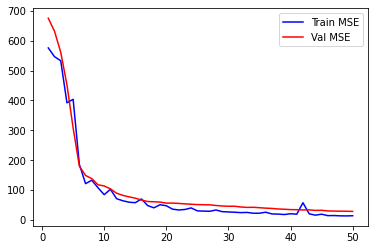

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

import matplotlib.pyplot as plt
plt.plot(epochs, loss,'b',label='Train MSE')
plt.plot(epochs, val_loss,'r',label='Val MSE')
plt.legend()
plt.show()

In [0]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 24.8178


24.817760467529297

In [0]:
y_pred= model.predict(x_test)
y_pred

array([[31.442322 ],
       [19.419222 ],
       [23.44393  ],
       [19.013136 ],
       [21.581758 ],
       [24.934675 ],
       [28.555185 ],
       [23.171938 ],
       [19.111124 ],
       [28.432661 ],
       [23.308516 ],
       [22.843292 ],
       [20.682543 ],
       [23.853624 ],
       [13.672672 ],
       [18.429014 ],
       [17.928154 ],
       [20.4172   ],
       [15.59369  ],
       [14.593526 ],
       [18.258413 ],
       [12.231708 ],
       [18.596224 ],
       [13.737602 ],
       [15.791793 ],
       [11.224872 ],
       [11.187774 ],
       [10.177368 ],
       [20.475924 ],
       [37.310085 ],
       [23.992464 ],
       [21.69081  ],
       [28.068874 ],
       [28.769655 ],
       [25.055803 ],
       [34.00389  ],
       [31.625227 ],
       [19.965687 ],
       [22.762518 ],
       [10.985086 ],
       [24.633444 ],
       [32.060204 ],
       [23.045515 ],
       [30.753008 ],
       [24.702696 ],
       [22.45967  ],
       [25.352411 ],
       [36.95